## CCI Demo: Using Data Cube from AWS bucket

This demo uses xcube to read ESA CCI datasets as data cubes.

In [1]:
import IPython.display
import xcube

from xcube.core.dsio import open_cube
from xcube.core.geom import mask_dataset_by_geometry
from xcube.core.geom import clip_dataset_by_geometry
from xcube.core.extract import get_cube_values_for_points
from xcube.core.timeseries import 

Utilize 4-node Dask-Cluster (each node has 16 CPUs and 64 GB RAM).

In [2]:
from dask.distributed import Client
client = Client("52.58.160.50:8786")

Reading cube directly from AWS bucket by providing the url

In [3]:
cube = open_cube("https://s3.eu-central-1.amazonaws.com/xcube-dcfs/dcfs_demo_cci_cube_2008_10_c1_640_640-optimized.zarr")

Displaying information about the cube.

In [13]:
cube

<xarray.Dataset>
Dimensions:             (bnds: 2, lat: 2160, lon: 4320, time: 138)
Coordinates:
  * lat                 (lat) float32 89.958336 89.875 ... -89.87428 -89.95761
    lat_bnds            (lat, bnds) float32 dask.array<shape=(2160, 2), chunksize=(2160, 2)>
  * lon                 (lon) float32 -179.95833 -179.875 ... 179.87357 179.9569
    lon_bnds            (lon, bnds) float32 dask.array<shape=(4320, 2), chunksize=(4320, 2)>
  * time                (time) datetime64[ns] 2008-01-05 ... 2010-12-31
    time_bnds           (time, bnds) datetime64[ns] dask.array<shape=(138, 2), chunksize=(138, 2)>
Dimensions without coordinates: bnds
Data variables:
    air_temperature_2m  (time, lat, lon) float32 dask.array<shape=(138, 2160, 4320), chunksize=(1, 640, 640)>
    analysed_sst        (time, lat, lon) float32 dask.array<shape=(138, 2160, 4320), chunksize=(1, 640, 640)>
    evaporation         (time, lat, lon) float32 dask.array<shape=(138, 2160, 4320), chunksize=(1, 640, 640)>
   

Displaying information about a cube variable.

In [12]:
cube.analysed_sst

<xarray.DataArray 'analysed_sst' (time: 138, lat: 2160, lon: 4320)>
dask.array<shape=(138, 2160, 4320), dtype=float32, chunksize=(1, 640, 640)>
Coordinates:
  * lat      (lat) float32 89.958336 89.875 89.791664 ... -89.87428 -89.95761
  * lon      (lon) float32 -179.95833 -179.875 -179.79167 ... 179.87357 179.9569
  * time     (time) datetime64[ns] 2008-01-05 2008-01-13 ... 2010-12-31
Attributes:
    ID:                        44
    esa_cci_path:              /neodc/esacci/sst/data/lt/Analysis/L4/v01.1/
    long_name:                 Analysed Sea Surface Temperature
    orig_attrs:                {'Conventions': 'CF-1.5, Unidata Observation D...
    orig_version:              v01.1
    project_name:              ESA Sea Surface Temperature Climate Change Ini...
    time_coverage_end:         2010-12-31
    time_coverage_resolution:  P8D
    time_coverage_start:       1991-09-02
    url:                       http://www.esa-sst-cci.org

Taking a look at the time dimension of a cubes variable.

In [4]:
cube.analysed_sst.time.values

array(['2008-01-05T00:00:00.000000000', '2008-01-13T00:00:00.000000000',
       '2008-01-21T00:00:00.000000000', '2008-01-29T00:00:00.000000000',
       '2008-02-06T00:00:00.000000000', '2008-02-14T00:00:00.000000000',
       '2008-02-22T00:00:00.000000000', '2008-03-01T00:00:00.000000000',
       '2008-03-09T00:00:00.000000000', '2008-03-17T00:00:00.000000000',
       '2008-03-25T00:00:00.000000000', '2008-04-02T00:00:00.000000000',
       '2008-04-10T00:00:00.000000000', '2008-04-18T00:00:00.000000000',
       '2008-04-26T00:00:00.000000000', '2008-05-04T00:00:00.000000000',
       '2008-05-12T00:00:00.000000000', '2008-05-20T00:00:00.000000000',
       '2008-05-28T00:00:00.000000000', '2008-06-05T00:00:00.000000000',
       '2008-06-13T00:00:00.000000000', '2008-06-21T00:00:00.000000000',
       '2008-06-29T00:00:00.000000000', '2008-07-07T00:00:00.000000000',
       '2008-07-15T00:00:00.000000000', '2008-07-23T00:00:00.000000000',
       '2008-07-31T00:00:00.000000000', '2008-08-08

Plotting a cubes variable for a certain date. 

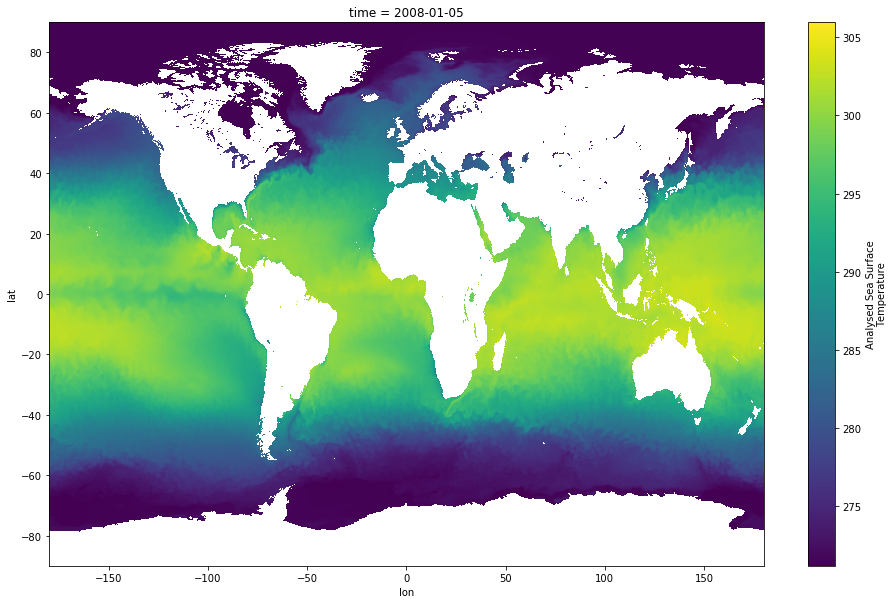

distributed.client - ERROR - Failed to reconnect to scheduler after 10.00 seconds, closing client


In [17]:
cube.analysed_sst.sel(time='2008-01-05', method = 'nearest').plot.imshow(figsize=(16,10))

Computing Sea Surface Annomaly from the cubes Sea Surface Temperature.

In [7]:
sst_anomaly = cube.analysed_sst - cube.analysed_sst.mean(dim='time')
sst_anomaly.attrs['long_name'] = 'Sea Surface Temperature Anomaly'
sst_anomaly

<xarray.DataArray 'analysed_sst' (time: 138, lat: 2160, lon: 4320)>
dask.array<shape=(138, 2160, 4320), dtype=float32, chunksize=(1, 640, 640)>
Coordinates:
  * lat      (lat) float32 89.958336 89.875 89.791664 ... -89.87428 -89.95761
  * lon      (lon) float32 -179.95833 -179.875 -179.79167 ... 179.87357 179.9569
  * time     (time) datetime64[ns] 2008-01-05 2008-01-13 ... 2010-12-31
Attributes:
    long_name:  Sea Surface Temperature Anomaly

Plotting the Sea Surface Anomomaly for January 5th 2008. 

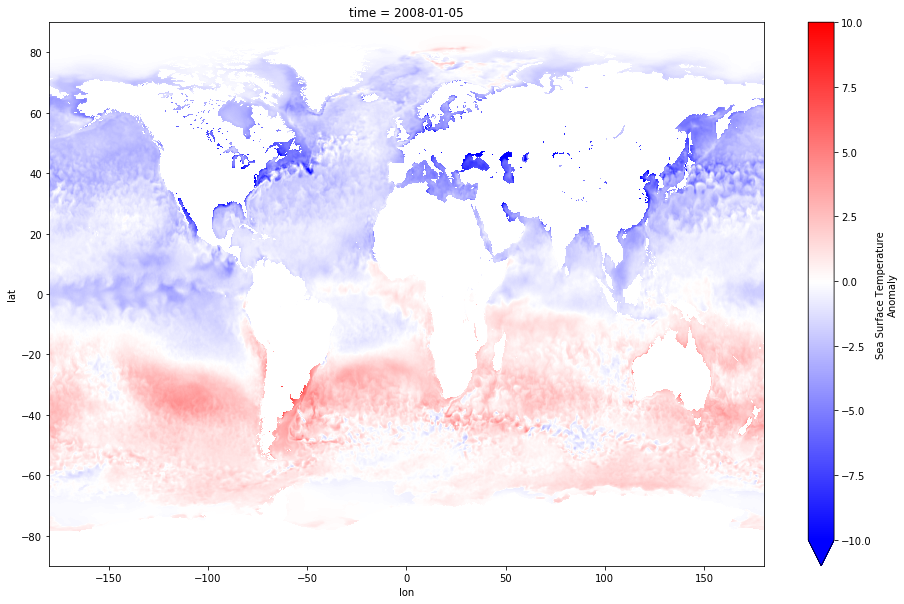

In [16]:
sst_anomaly.sel(time='2008-01-05', method = 'nearest').plot.imshow(vmin=-10, vmax=10, cmap='bwr', figsize=(16,10))

Plotting the Sea Surface Anomomaly for August 1st 2009. 

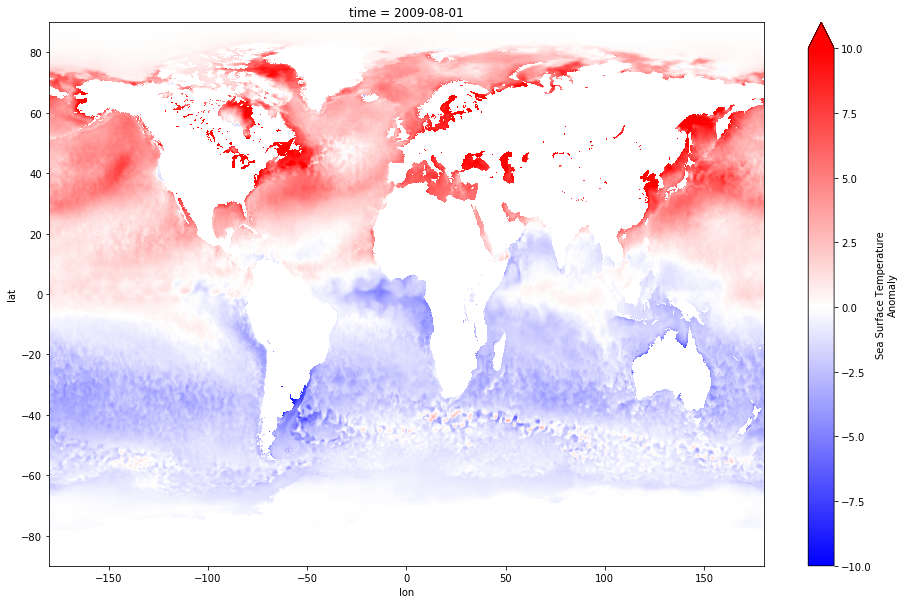

In [15]:
sst_anomaly.sel(time='2009-08-01', method = 'nearest').plot.imshow(vmin=-10, vmax=10, cmap='bwr', figsize=(16,10))

Plotting the mean of Seas Surface Temperature.

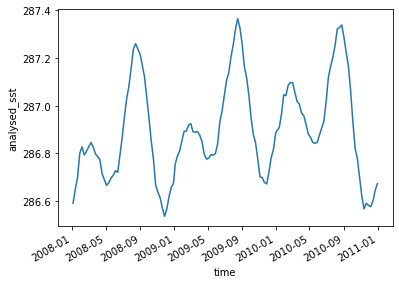

In [11]:
 cube.analysed_sst.mean(dim=('lat', 'lon')).plot.line()